Регрессия – это зависимость среднего значения какой-либо величины от некоторой другой величины или от нескольких других величин. В отличие от чисто функциональной зависимости y=f(x), когда каждому значению независимой переменной x соответствует одно определённое значение зависимой переменной у, при регрессионной связи одному и тому же значению независимой переменной (фактору) x могут соответствовать в зависимости от конкретного случая различные значения зависимой переменной (отклика) у.

Изучение регрессии основано на том, что случайные величины Х и Y связаны между собой вероятностной зависимостью: при каждом конкретном значении X=x величина Y является случайной величиной с вполне определённым распределением вероятностей. Зависимость зависимой переменной – отклика от одной независимой переменной – фактора или нескольких факторов называется уравнением регрессии. По количеству факторов выделяют парную (однофакторную) и множественную (многофакторную) регрессию. Для парной будем рассматривать следующие методы регрессии: линейную, показательную, экспоненциальную, гиперболическую и параболическую.

Регрессионный анализ – это раздел математической статистики, изучающий регрессионную зависимость между случайными величинами по статистическим данным. Цель регрессионного анализа состоит в определении общего вида уравнения регрессии, вычислении оценок неизвестных параметров, входящих в уравнение регрессии проверке статистических гипотез о регрессионной связи.

Таким образом, регрессионный анализ – набор статистических методов исследования влияния одной или нескольких независимых переменных X1,…,Xn на зависимую переменную Y. Независимые переменные иначе называют регрессорами или предикторами, а зависимые переменные – критериальными переменными.

## Линейная регрессия
Линейная регрессия (Linear regression) – модель зависимости переменной x от одной или нескольких других переменных (факторов, регрессоров, независимых переменных) с линейной функцией зависимости. Линейная регрессия относится к задаче определения «линии наилучшего соответствия» через набор точек данных и стала простым предшественником нелинейных методов, которые используют для обучения нейронных сетей.

Цель линейной регрессии — поиск линии, которая наилучшим образом соответствует этим точкам. Напомним, что общее уравнение для прямой есть 
f (x) = b +mx, где m – наклон линии, а b – его сдвиг.

## Функция потерь — метод наименьших квадратов
Функция потерь – это мера количества ошибок, которые наша линейная регрессия делает на наборе данных. Хотя есть разные функции потерь, все они вычисляют расстояние между предсказанным значением y(х) и его фактическим значением.
Одна очень распространенная функция потерь называется средней квадратичной ошибкой MSE. Чтобы вычислить MSE, мы просто берем все значения ошибок, считаем их квадраты длин и усредняем.

## Задача экстраполяции

Допустим у нас есть много экспериментальных точек. Необходимо через них провести кривую, которая как можно ближе проходила к этим точкам. При этом необходимо минимизировать среднюю квадратичную ошибку (MSE).
Для решения данной задачи в Python есть множество библиотек. Самыми распространенными выступают:

numpy - numpy.linalg.lstsq
scipy - scipy.linalg (содержит все функции из numpy.linalg плюс часть новых функций, которых нет в numpy.linalg).

1.1.1 Пример
Проведем прямую y = mx + b  через экспериментальные точки.

In [377]:
import numpy as np 
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

A = np.vstack([x, np.ones(len(x))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [378]:
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

0.9999999999999999 -0.9499999999999997


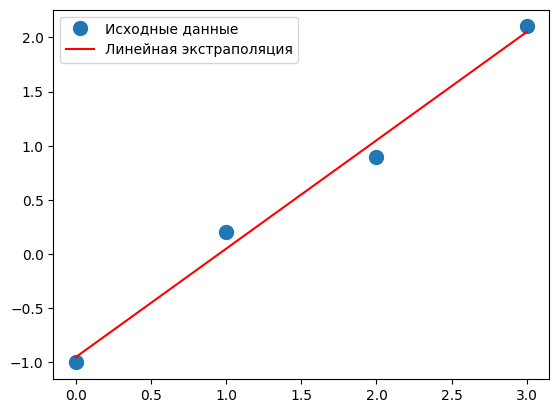

In [379]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x+c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

1.1.2 Пример

Пусть x, y – вектора длиной n > 3 (точек > 3). Задача заключается в построении экстраполяционного полинома второго порядка (параболы). Таким образом, необходимо найти такие коэффициенты полинома a, b, c по методу наименьших квадратов. Данные могут быть получены в результате измерений. Покажем пример генерации данных случайным образом и загрузки их из файла.

In [380]:
from numpy import *
from numpy.random import *
#генерируем случайные x и y
delta = 1.0

x = linspace(-5,5,11)
y = x**2+delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)

#записываем данные в файл
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

#считываем данные из файла
x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

print(x)
print(y)

[-4.72494988 -3.74236587 -2.90705376 -1.67624216 -0.97850521  0.09187017
  0.63095345  2.3883186   2.74171731  4.15420422  5.3014385 ]
[25.19003632 15.69751376  8.61498788  4.21627718  1.06506689  0.07842658
  1.30898353  3.72227688  8.93920572 15.90754051 25.12399565]


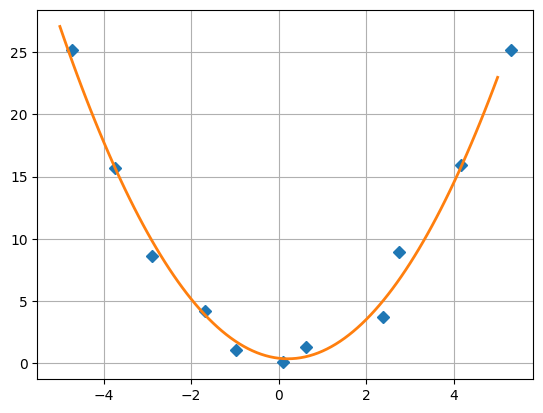

In [381]:
# Нахождение коэффициентов функции вида y = ax^2 + bx + c методом наименьших квадратов
# Задаем вектор m = [x**2, x, E]
m = vstack([x**2, x, ones(len(x))]).T
# Находим коэффициенты a, b, c
s = np.linalg.lstsq(m, y, rcond = None)[0]

# На отрезке [-5, 5] 
x_prec = linspace(-5, 5, 101)
# Рисуем точки
plt.plot(x, y, 'D')
# Рисуем кривую вида y = ax^2 + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0]*x_prec**2 + s[1]*x_prec + s[2], '-', lw=2)
plt.grid()
plt.show()

1.1.3 Пример

По данным предыдущего примера постройте экстраполяционного полинома третьего порядка

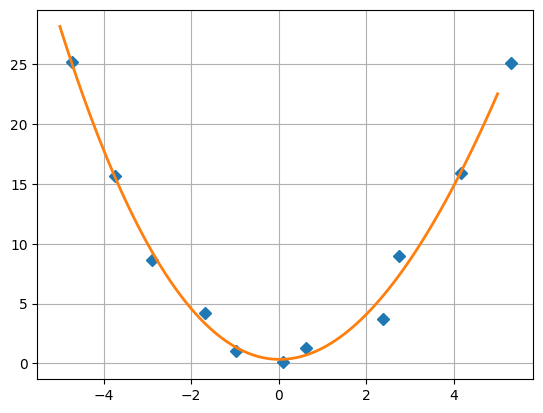

In [382]:
m = vstack((x**3, x**2, x, ones(len(x)))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-5, 5, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0]*x_prec**3 + s[1]*x_prec**2 + s[2]*x_prec + s[3], '-', lw=2)
plt.grid()
plt.show()

Задание:

Представьте собственные данные и постройте экстраполяцию полиномами первой, второй и третьей степени.

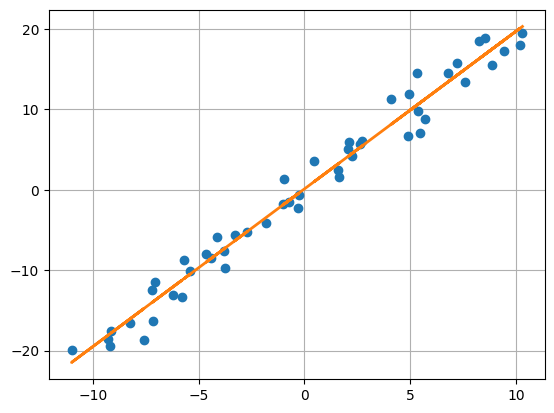

In [383]:
# y = kx + b
delta = 3.0
x = linspace(-10, 10, 50)
y = 2*x + delta*(rand(50)-0.5)
x += delta*(rand(50)-0.5)
m = vstack((x, ones(len(x)))).T
k, b = np.linalg.lstsq(m, y, rcond = None)[0]
plt.plot(x, y, 'o')
plt.plot(x, k*x + b, lw=2)
plt.grid()
plt.show()

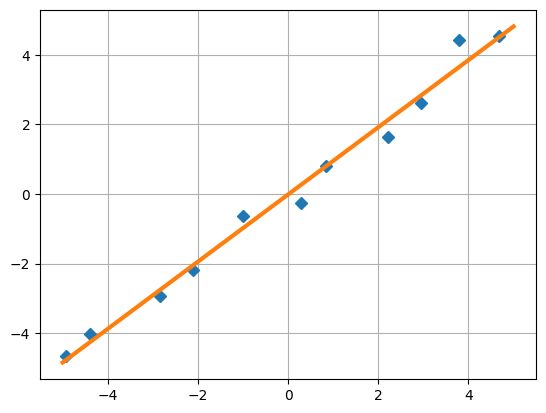

In [384]:
delta = 1.0
x = linspace(-5,5,11)
y = x+delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)
m = vstack((x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]
x_prec = linspace(-5,5,101)
plt.plot(x,y,'D')
plt.plot(x_prec, s[0] * x_prec + s[1],'-', lw = 3)
plt.grid()

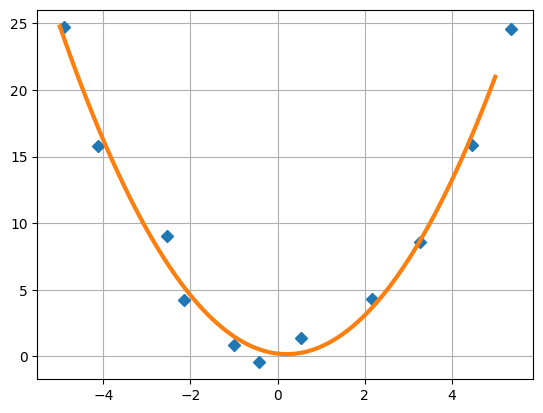

In [385]:
delta = 1.0
x = linspace(-5,5,11)
y = x**2+delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)
m = vstack((x**2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]
x_prec = linspace(-5,5,101)
plt.plot(x,y,'D')
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2],'-', lw = 3)
plt.grid()

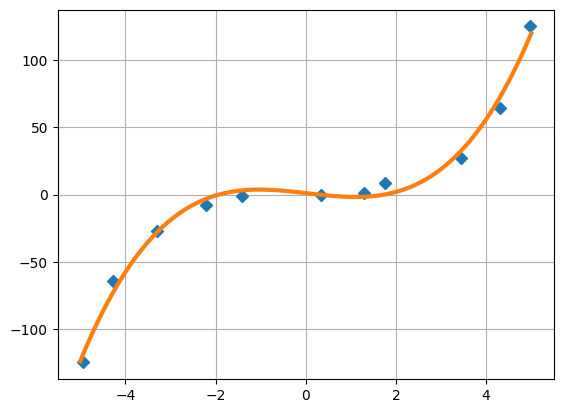

In [386]:
delta = 1.0
x = linspace(-5,5,11)
y = x**3+delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)
m = vstack((x**3, x**2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]
x_prec = linspace(-5,5,101)
plt.plot(x,y,'D')
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec + s[3],'-', lw = 3)
plt.grid()

1.1.4 Пример

Необходимо проверить гипотезу, что наши точечно заданная функция ложится на кривую вида f(x,b) = b0 + b1exp(-b2x^2)

[0.24382905 0.75456512 0.49481446]
0.00018653115145941785
0.09728160282180451


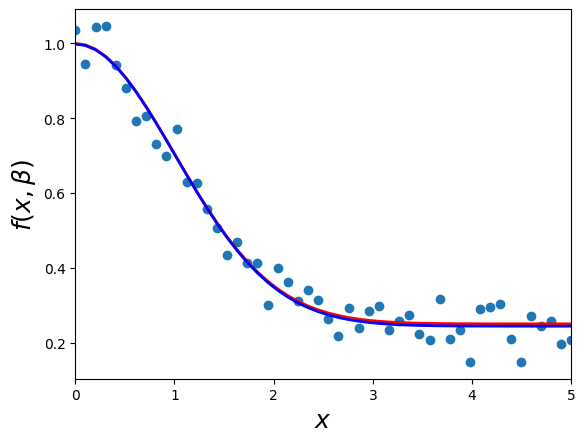

In [387]:
# Добавим шум к данным
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)

xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

from scipy.optimize import curve_fit
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata, label='Data')
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

1.1.5 Пример

Необходимо проверить гипотезу, что наши точечно заданная функция ложится на кривые вида: 
1. f(x,b) = b0 + b1x 
2. f(x,b) = b0 + b1x + b2x^2 
3. f(x,b) = b0 + b1ln(x) 
4. f(x,b) = b0 + x^b1 

[0.27160184 0.74171169]
lin_dev:  0.00010619582421962607
fres:  0.09337908413814582


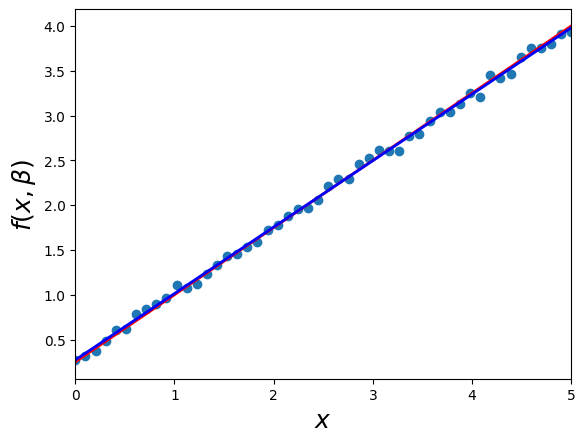

In [388]:
# Добавим шум к данным
beta = (0.25, 0.75)
def f(x, b0, b1):
    return b0 + b1 * x

xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

from scipy.optimize import curve_fit
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print("lin_dev: ", lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print("fres: ", fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata, label='Data')
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()


[0.2617388  0.75755112 0.49769898]
0.00014580115389925736
0.12158290400819763


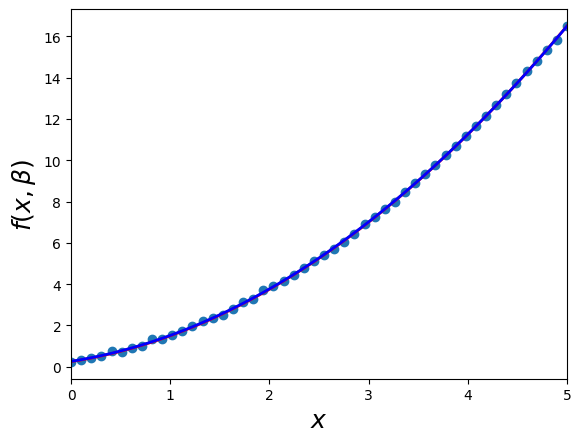

In [389]:
# Добавим шум к данным
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 *x + b2 * x**2

xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

from scipy.optimize import curve_fit
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata, label='Data')
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[0.26255005 0.74323032]
6.796360993397256e-05
0.1571618631631075


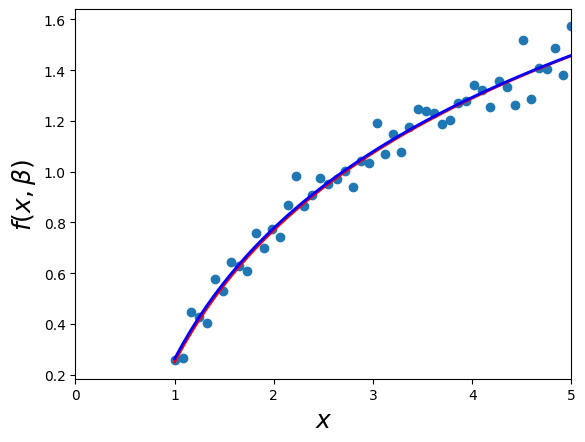

In [390]:
# Добавим шум к данным
beta = (0.25, 0.75)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)

xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

from scipy.optimize import curve_fit
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata, label='Data')
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[0.25529789 0.74765308]
-0.00026683288136140454
0.12588710124963742


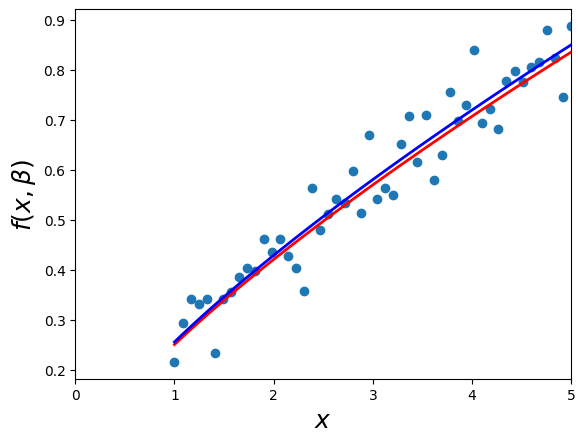

In [391]:
# Добавим шум к данным
beta = (0.25, 0.75)
def f(x, b0, b1):
    return b0 * x**b1

xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

from scipy.optimize import curve_fit
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata, label='Data')
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

1.2. Теоретический материал – Задачи регрессии

Линейная регрессия - это широко используемый метод статистического анализа, который использует регрессионный анализ в математической статистике для определения количественной взаимосвязи между двумя или более переменными. Если регрессионный анализ включает две или более независимых переменных, а связь между зависимой и независимой переменными является линейной, тогда имееи дело с множественной линейной регрессией.

В этом разделе мы увидим, как библиотеку Scikit-Learn в Python для машинного обучения можно использовать для реализации функций регрессии. Мы начнем с простой линейной регрессии с участием двух переменных, а затем перейдем к линейной регрессии с участием нескольких переменных.


1.2.1 Пример

Построим простую линейную регрессию в Python с использованием библиотеки scikit-learn

In [392]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [393]:
my_dict = {'Учебное время': [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50], 
           'Оценка': [10, 22, 13, 43, 20, 22, 33, 50, 62, 48, 55, 75, 62, 73, 81, 76, 64, 82, 90, 93]}
df = DataFrame(my_dict)
print(df.shape)
print(df.describe())    

(20, 2)
       Учебное время     Оценка
count      20.000000  20.000000
mean        2.787500  53.700000
std         1.507165  26.435821
min         0.500000  10.000000
25%         1.687500  30.250000
50%         2.625000  58.500000
75%         4.062500  75.250000
max         5.500000  93.000000


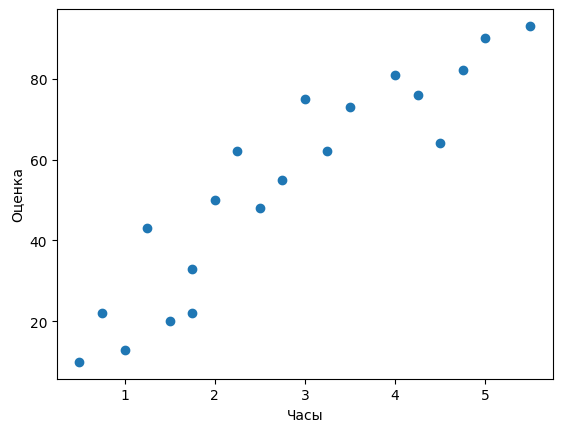

In [394]:
plt.scatter(df['Учебное время'], df['Оценка'])
plt.xlabel('Часы')
plt.ylabel('Оценка')
plt.show()

После того как мы получили представление о данных, разделим информацию на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки – это зависимые переменные, значения которых должны быть предсказаны. В нашем наборе всего два столбца и необходимо предсказать оценку в зависимости от количества часов. Чтобы извлечь атрибуты и метки, выполните следующий скрипт:

In [395]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
print(X)
print(y)

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]


In [396]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

5.475400029908791
[17.02706744]


Получившийся результат можно интерпретировать следующим образом: с каждым затраченным часом на обучение результат экзамена повышается приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы будем использовать наши тестовые данные и посмотрим, насколько точно наш алгоритм предсказывает процентную оценку. Чтобы сделать прогноз на тестовых данных необходимо выполнить следующий код:

In [397]:
y_pred = regressor.predict(X_test)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df1)

   Actual  Predicted
0      90  90.610737
1      22  18.245701
2      93  99.124271
3      62  43.786302


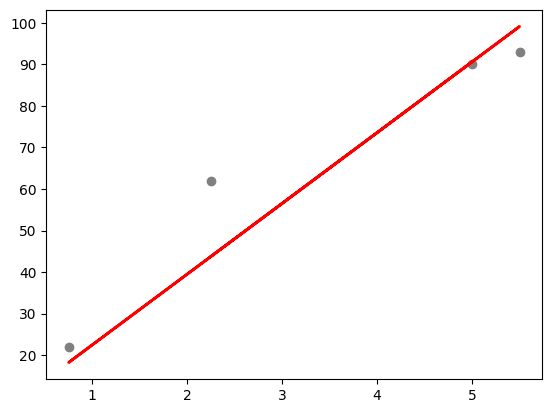

In [398]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

Задание:

Постройте модель линейной регрессии для произвольных данных из двух столбцов.
Найдите коэффициенты линии регрессии. Постройте прогноз.


In [399]:
df = pd.read_csv("https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv")
print(df.columns)
print(df.head())
print(df.describe())
print(df.shape)

Index(['YearsExperience', 'Salary'], dtype='object')
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000
(30, 2)


In [400]:
X = df['YearsExperience'].values.reshape(-1, 1)
y = df['Salary'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.round(0)})
print(df1)
print(regressor.intercept_.round(2))
print(regressor.coef_.round(2))

     Actual  Predicted
0   37731.0    40749.0
1  122391.0   122700.0
2   57081.0    64962.0
3   63218.0    63099.0
4  116969.0   115250.0
5  109431.0   107800.0
26780.1
[9312.58]


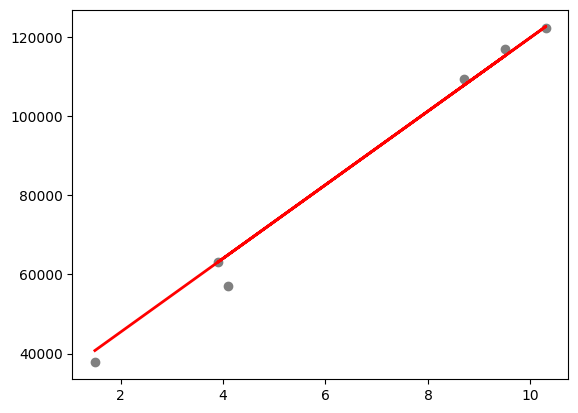

In [401]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

1.3. Теоретический материал – Множественная регрессия

В предыдущем примере мы проиллюстрировали линейную регрессию с двумя переменными. Однако, почти все реальные задачи имеют больше параметров. Линейная регрессия с участием нескольких переменных называется «множественной линейной регрессией» или многомерной линейной регрессией. Шаги для выполнения множественной линейной регрессии аналогичны шагам для простой . Разница заключается в оценке. Вы можете использовать множественную регрессию, чтобы узнать, какой фактор оказывает наибольшее влияние на прогнозируемый результат или как различные переменные связаны друг с другом.

1.3.1 Пример

Для решения задачи множественной регрессии можно задействовать уже известный метод numpy.linalg.lstsq.

In [402]:
import numpy as np
y = [1, 2, 3, 4, 3, 4, 5, 3, 5, 5, 4, 5, 4, 5, 4, 6, 0, 6, 3, 1, 3, 1]
X = [[0,2,4,1,5,4,5,9,9,9,8,7,6,9,7,1,2,5,8,6,7,8], 
     [1,3,5,2,6,5,6,0,0,0,1,2,3,0,2,6,3,1,4,5,2,1], 
     [0,2,4,1,5,4,5,0,0,0,1,2,3,0,2,6,3,1,4,5,2,1]]
X = np.transpose(X)
X = np.c_[np.ones(X.shape[0]), X]
linreg = np.linalg.lstsq(X, y, rcond = None)[0]
print(linreg)

[2.53459431 0.15391969 0.00298407 0.04485584]


Кроме этого можно использовать возможности библиотеки sсikit-learn. Рассмотрим пример.

1.3.2 Пример

Для данных из предыдущей задачи построить модель множественной линейной регрессии с использованием средств библиотеки sсikit-learn.

In [403]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as seabornInstance

In [404]:
y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,8,7,6,9,7,1,2,5,8,6,7,8], 
     [1,3,5,2,6,5,6,0,0,0,1,2,3,0,2,6,3,1,4,5,2,1], 
     [0,2,4,1,5,4,5,0,0,0,1,2,3,0,2,6,3,1,4,5,2,1]]

new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_X = np.array(X)
new_X = new_X.transpose()
df2 = pd.DataFrame(new_X)
df1 = df1.rename(columns={0: 'y'}, inplace=False)
df2 = df2.rename(columns={0: 'X1', 1: 'X2', 2: 'X3'}, inplace=False)

frames = [df1, df2]
dataset = pd.concat(frames, axis=1, join='inner')
print(dataset.head())
print(dataset.describe())
print(dataset.shape)

   y  X1  X2  X3
0  1   0   1   0
1  2   2   3   2
2  3   4   5   4
3  4   1   2   1
4  3   5   6   5
               y         X1         X2         X3
count  22.000000  22.000000  22.000000  22.000000
mean    3.500000   5.545455   2.636364   2.318182
std     1.683251   2.890498   2.105445   1.936771
min     0.000000   0.000000   0.000000   0.000000
25%     3.000000   4.000000   1.000000   1.000000
50%     4.000000   6.000000   2.000000   2.000000
75%     5.000000   8.000000   4.750000   4.000000
max     6.000000   9.000000   6.000000   6.000000
(22, 4)


In [405]:
X = dataset[['X1', 'X2', 'X3']]
y = dataset['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.root_mean_squared_error(y_test, y_pred))

    Coefficient
X1     0.115950
X2     0.104793
X3    -0.044637
    Actual  Predicted
20       3   3.602835
10       4   3.658630
14       4   3.602835
13       5   3.714425
1        2   3.127877
Mean Absolute Error: 0.7509645245489359
Root Mean Squared Error: 0.8440964784873001


['Пол', 'Длина', 'Диаметр', 'Высота', 'Общий вес', 'Вес без раковины',
       'Вес внутренностей', 'Вес раковины', 'Кольца']

In [406]:
df = pd.read_csv('abalone.csv')
print(df.columns)
print(df.head())
print(df.describe())

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')
  Sex  Length  Diameter  ...  Viscera weight  Shell weight  Rings
0   M   0.455     0.365  ...          0.1010         0.150     15
1   M   0.350     0.265  ...          0.0485         0.070      7
2   F   0.530     0.420  ...          0.1415         0.210      9
3   M   0.440     0.365  ...          0.1140         0.155     10
4   I   0.330     0.255  ...          0.0395         0.055      7

[5 rows x 9 columns]
            Length     Diameter  ...  Shell weight        Rings
count  4177.000000  4177.000000  ...   4177.000000  4177.000000
mean      0.523992     0.407881  ...      0.238831     9.933684
std       0.120093     0.099240  ...      0.139203     3.224169
min       0.075000     0.055000  ...      0.001500     1.000000
25%       0.450000     0.350000  ...      0.130000     8.000000
50%       0.545000     0.425000  ...      0.2

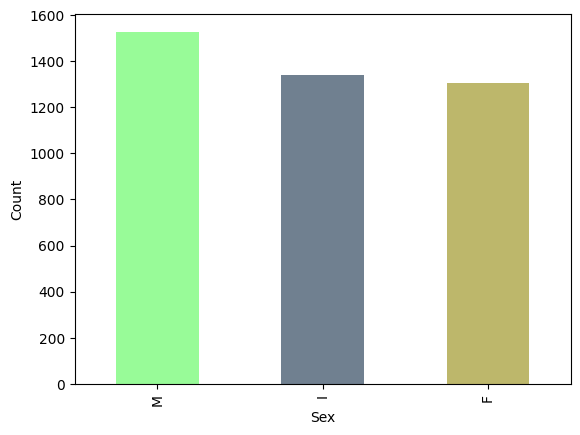

In [407]:
ax = df.value_counts('Sex').plot(kind='bar', color=["palegreen", 'slategray', 'darkkhaki'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Whole weight'}>],
       [<Axes: title={'center': 'Shucked weight'}>,
        <Axes: title={'center': 'Viscera weight'}>,
        <Axes: title={'center': 'Shell weight'}>,
        <Axes: title={'center': 'Rings'}>]], dtype=object)

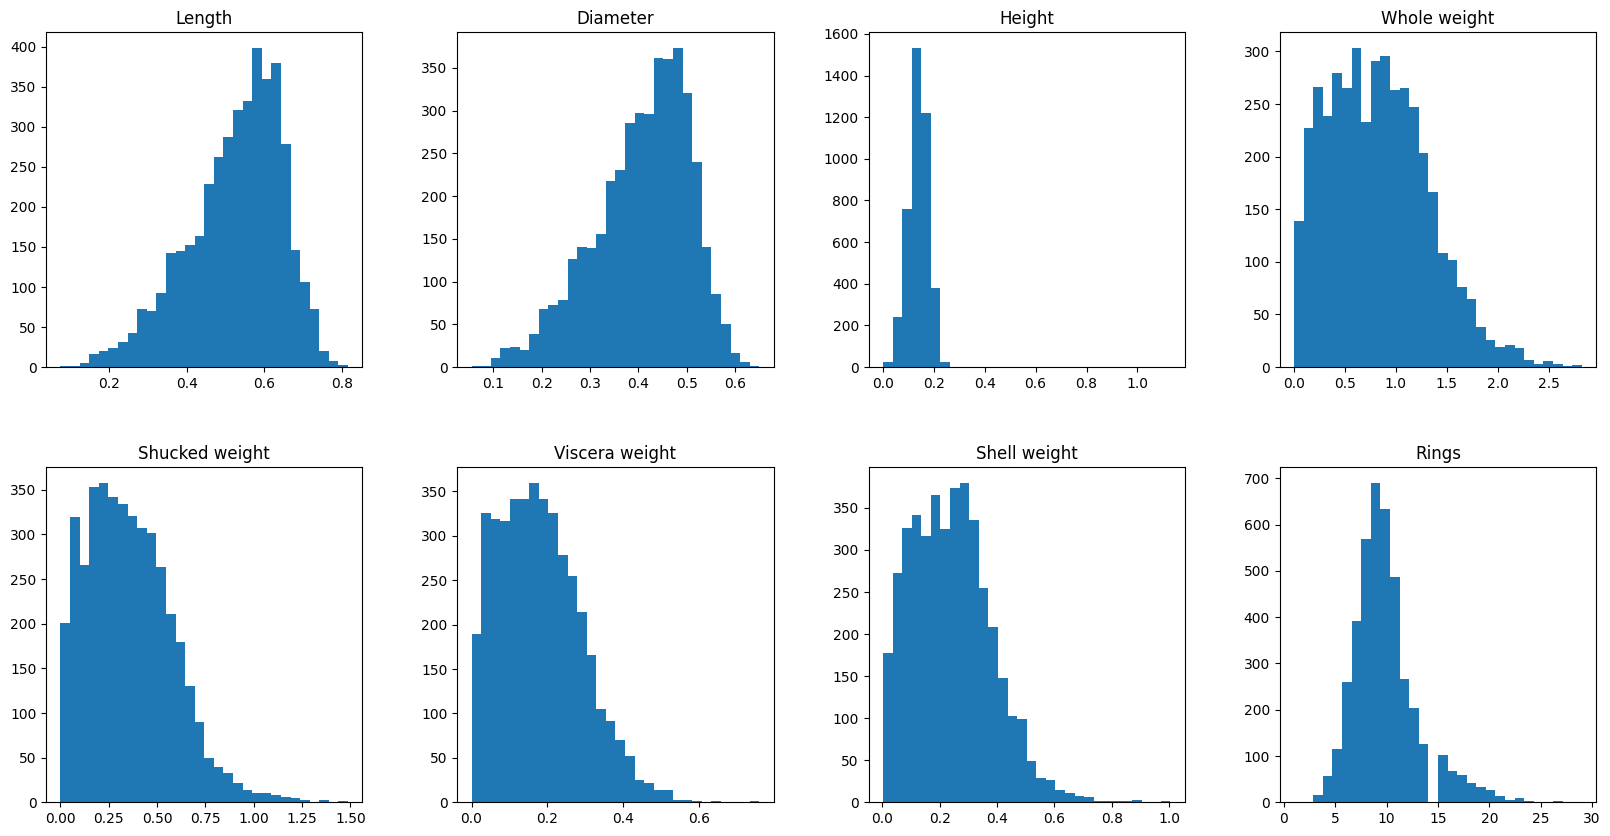

In [408]:
df.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

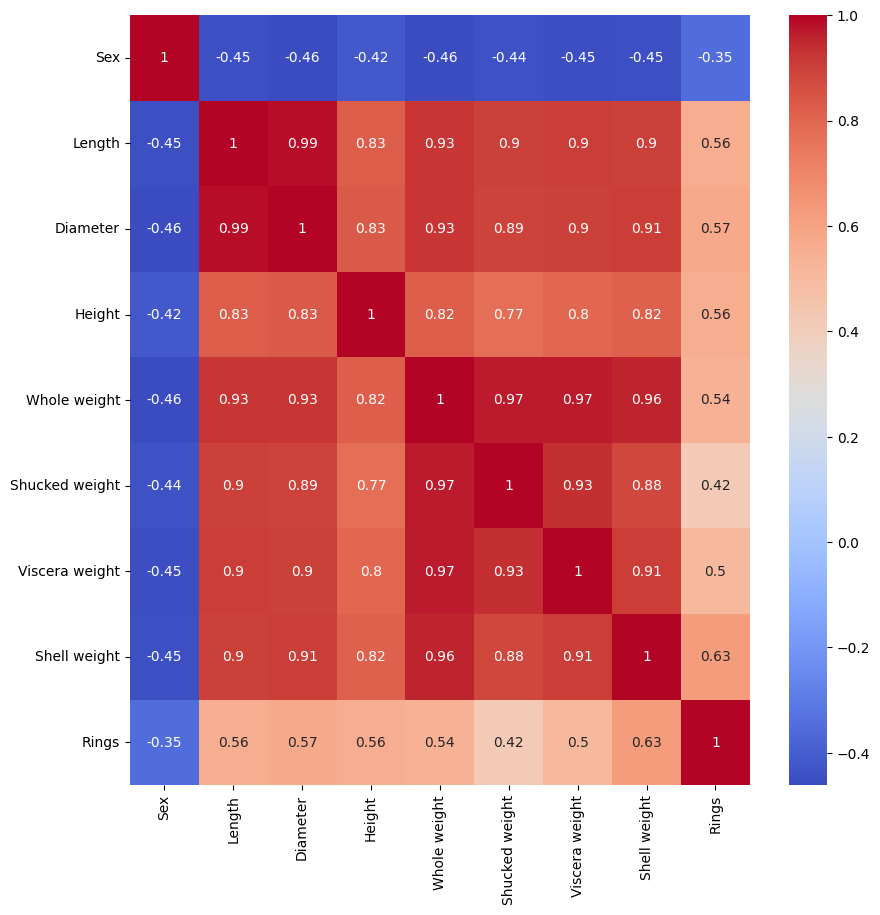

In [409]:
import seaborn as sns
# Корреляция между признаками
df['Sex'] = df['Sex'].map({'M': 0, 'F': 1, 'I': 2}) 
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [410]:
X = df[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']]
y = df['Rings']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.root_mean_squared_error(y_test, y_pred))

                Coefficient
Length            -1.268301
Diameter          13.435928
Height             9.165784
Whole weight       9.662898
Shucked weight   -20.626437
Viscera weight    -9.947989
Shell weight       8.152597
      Actual  Predicted
668       13  12.976738
1580       8   9.651631
3784      11  10.300840
463        5   5.656562
2615      12  10.637666
...      ...        ...
575       11  10.557594
3231      12   8.607339
1084       7   8.562445
290       17  12.012650
2713       4   5.801700

[836 rows x 2 columns]
Mean Absolute Error: 1.6151862192084634
Root Mean Squared Error: 2.259066558151884


Задание*

Задача: Экспериментально получены N − значений величины Y при различных значениях величины X. Определить коэффициенты полиномов первой и второй степени, аппроксимирующих результаты эксперимента, с применением метода наименьших квадратов. Вычислить СКО.

| x   | y   |
|-----|-----|
| 0.0 | 3.0 |
| 0.2 | 6.0 |
| 0.4 | 3.0 |
| 0.6 | 6.0 |
| 0.8 | 4.0 |
| 1.0 | 3.0 |


In [437]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error

X = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
y = np.array([3.0, 6.0, 3.0, 6.0, 4.0, 3.0])

In [438]:
# Полином первой степени
coeffs_1 = np.polyfit(X, y, 1)
print("Коэффициенты полинома первой степени:", coeffs_1)

# Полином второй степени
coeffs_2 = np.polyfit(X, y, 2)
print("Коэффициенты полинома второй степени:", coeffs_2)

Коэффициенты полинома первой степени: [-0.42857143  4.38095238]
Коэффициенты полинома второй степени: [-7.14285714  6.71428571  3.42857143]


In [439]:
# Предсказания для полинома первой степени
Y_pred_1 = np.polyval(coeffs_1, X)

# Вычисление СКО для первой степени
rmse_1 = metrics.root_mean_squared_error(y, Y_pred_1)
print("СКО для полинома первой степени:", rmse_1)

# Предсказания для полинома второй степени
Y_pred_2 = np.polyval(coeffs_2, X)

# Вычисление СКО для второй степени
rmse_2 = metrics.root_mean_squared_error(y, Y_pred_2)
print("СКО для полинома второй степени:", rmse_2)

СКО для полинома первой степени: 1.3357121636516542
СКО для полинома второй степени: 1.1296860077873303


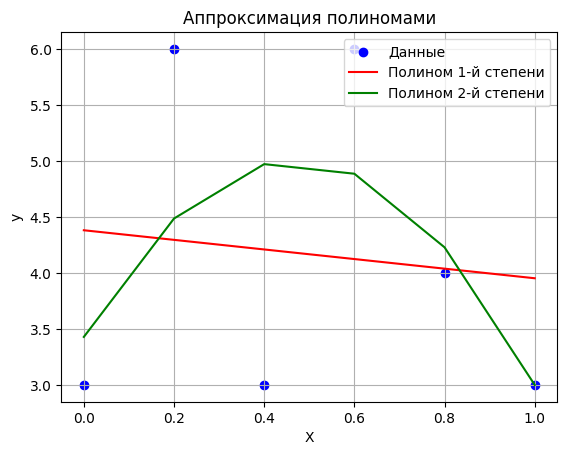

In [441]:
# Визуализация данных и аппроксимаций
plt.scatter(X, y, label='Данные', color='blue')

plt.plot(X, Y_pred_1, label='Полином 1-й степени', color='red')

plt.plot(X, Y_pred_2, label='Полином 2-й степени', color='green')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Аппроксимация полиномами')
plt.legend()
plt.grid()
plt.show()